# Redes Neuronales Artificiales - Perceptrón Simple
**Autor:** [Tu nombre]  
**Fecha:** Noviembre 1, 2025

## Descripción
Este notebook implementa un perceptrón simple para clasificación binaria, utilizando un conjunto de datos sobre suscripciones premium basadas en el uso y gasto mensual de usuarios.

## Contenido
1. [Carga y Preparación de Datos](#1-carga-y-preparación-de-datos)
2. [Selección de Variables y Función de Activación](#2-selección-de-variables)
3. [Configuración de Datos de Prueba](#3-configuración-de-datos-de-prueba)
4. [Entrenamiento del Perceptrón](#4-entrenamiento-del-perceptrón)
5. [Evaluación del Modelo](#5-evaluación-del-modelo)
6. [Visualización de Resultados](#6-visualización-de-resultados)

## Librerías Utilizadas
- pandas: Manipulación de datos
- numpy: Operaciones numéricas
- sklearn: Preprocesamiento y métricas
- matplotlib: Visualización de datos
- joblib: Guardado de modelos

In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

pd.options.display.float_format = '{:,.2f}'.format

# 1 Cargar los datos
df = pd.read_csv("dataset2.csv")
df

,usuario_id,horas_uso_mensual,gasto_promedio_mensual,suscripcion_premium_aprobada
0,1,15,8,0
1,2,22,12,0
2,3,10,5,0
3,4,30,15,0
4,5,45,20,0
...,...,...,...,...
95,96,126,63,1
96,97,131,66,1
97,98,136,68,1
98,99,141,71,1


## 1-. Carga y Preparación de Datos

In [37]:
# 2. Selección de datos, objetivo y función de activación
pd.options.display.float_format = '{:,.2f}'.format

X = df[["horas_uso_mensual", "gasto_promedio_mensual"]].values
y = df["suscripcion_premium_aprobada"].values
X, y

(array([[ 15,   8],
        [ 22,  12],
        [ 10,   5],
        [ 30,  15],
        [ 45,  20],
        [ 55,  25],
        [ 20,  10],
        [ 35,  18],
        [ 12,   6],
        [ 40,  22],
        [ 60,  30],
        [ 65,  35],
        [ 70,  40],
        [ 75,  45],
        [ 80,  50],
        [ 85,  55],
        [ 90,  60],
        [ 95,  65],
        [100,  70],
        [105,  75],
        [110,  80],
        [115,  85],
        [120,  90],
        [125,  95],
        [130, 100],
        [135, 105],
        [140, 110],
        [145, 115],
        [150, 120],
        [155, 125],
        [160, 130],
        [165, 135],
        [170, 140],
        [175, 145],
        [180, 150],
        [185, 155],
        [190, 160],
        [195, 165],
        [200, 170],
        [  5,   3],
        [  7,   4],
        [ 18,   9],
        [ 28,  14],
        [ 38,  19],
        [ 48,  24],
        [ 58,  29],
        [ 68,  34],
        [ 78,  39],
        [ 88,  44],
        [ 98,  49],


## 2-. Selección de Variables y Función de Activación

In [38]:
# Función de activación H(x)

# w1*x1 + w2*x2 + ⋯ + wn*xn = sum(W * X ) = W @ X
def activacion(W, X, b):
    if ((W * X).sum() + b) > 0:
        return 1
    else:
        return 0

## 3-. Configuración de Datos de Prueba

In [60]:
# 3. Seteo de datos de prueba
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X) # fit con TRAIN
X_new = np.array([[135, 60]], dtype=float)
X_new_scaled = scaler.transform(np.array(X_new)).ravel()

rng = np.random.default_rng(42) # para obtener los mismos pesos iniciales, el mismo split, el mismo orden barajado, etc
#rng = np.random
W = rng.uniform(-1, 1, size=X_scaled.shape[1]) # Size=2 columnas
b = rng.uniform(-1, 1)
print("Wi=", W, " bi=",b, X_new, X_new_scaled)

# 4. Predicción sin entrenarmiento, resultado al azar
print("y_predi=",activacion(W, X_new_scaled, b))

Wi= [ 0.5479121  -0.12224312]  bi= 0.7171958398227649 [[135.  60.]] [0.44368601 0.34131737]
y_predi= 1


## 4-. Entrenamiento del Perceptrón

In [65]:
# 5. Entrenar_perceptron con n epocas
print("Wi=", W, " bi=",b) # ya asignados arriba
epocas = 100
tasa_de_aprendizaje = 0.01 # learning rate
for epoca in range(epocas):
    errores = 0
    for i in range(len(X_scaled)):
        y_pred = activacion(W, X_scaled[i], b)
        error = y[i] - y_pred
        if error != 0:
            W += tasa_de_aprendizaje * error * X_scaled[i]
            b += tasa_de_aprendizaje * error         
            errores += 1
    print(errores, end=" ")
# 6. Predicción luego de entrenar
print("\nAjustes y predicción final")
print("W=", W, " b=",b, " y_pred=",activacion(W, X_new_scaled, b))

Wi= [ 1.05048942 -0.34905035]  bi= -0.08280416017723523
8 7 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 4 4 4 4 4 4 4 4 4 4 4 4 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 
Ajustes y predicción final
W= [ 1.02120614 -0.37605634]  b= -0.12280416017723521  y_pred= 1


## 5-. Evaluación del Modelo

Métricas TEST (Perceptrón):
  Accuracy : 0.933
  Precision: 1.000
  Recall   : 0.905
  F1       : 0.950
Matriz de confusión:
 [[ 9  0]
 [ 2 19]]
              precision    recall  f1-score   support

           0      0.818     1.000     0.900         9
           1      1.000     0.905     0.950        21

    accuracy                          0.933        30
   macro avg      0.909     0.952     0.925        30
weighted avg      0.945     0.933     0.935        30



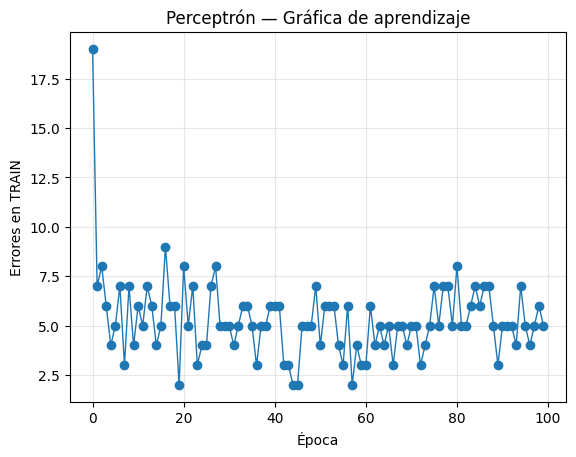

Nuevo caso [[135.0, 60.0]] -> predicción (0=no,1=sí): 1
Guardado: scaler_minmax.joblib, perceptron_pesos_y_bias.npz


In [69]:
# =========================
# NIVEL 1 — Perceptrón "from scratch" (versión depurada)
# =========================
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import joblib

# ---- 0) Datos
df = pd.read_csv("dataset2.csv")
assert set(["horas_uso_mensual","gasto_promedio_mensual","suscripcion_premium_aprobada"]).issubset(df.columns), "Faltan columnas requeridas"
X = df[["horas_uso_mensual","gasto_promedio_mensual"]].values.astype(float)
y = df["suscripcion_premium_aprobada"].astype(int).values  # 0/1

# ---- 1) Split + Escalado (fit SOLO con TRAIN)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)
scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc  = scaler.transform(X_test)

# ---- 2) Perceptrón (una sola función con historial)
def entrenar_perceptron_hist(
    X, y, lr=0.05, epocas=100, shuffle=True, early_stop=True, seed=42
):
    """
    Entrena un perceptrón con activación escalón.
    Guarda:
      - history_err: errores (muestras mal clasificadas) por época
      - history_params: (W, b) por época para visualizar la evolución si se desea
    """
    rng = np.random.default_rng(seed)
    W = rng.uniform(-1, 1, size=X.shape[1])   # pesos iniciales
    b = rng.uniform(-1, 1)                    # sesgo inicial

    history_err = []
    history_params = []

    for _ in range(epocas):
        idx = np.arange(len(X))
        if shuffle:
            rng.shuffle(idx)

        errores = 0
        for i in idx:
            z = np.dot(W, X[i]) + b
            y_hat = 1 if z > 0 else 0
            error = y[i] - y_hat
            if error != 0:
                # Regla del perceptrón (paso de corrección “a golpes”)
                W = W + lr * error * X[i]
                b = b + lr * error
                errores += 1

        history_err.append(errores)
        history_params.append((W.copy(), float(b)))

        # Si no hay errores, ya separó linealmente; detener
        if early_stop and errores == 0:
            break

    return W, b, history_err, history_params

W, b, history_err, history_params = entrenar_perceptron_hist(
    X_train_sc, y_train, lr=0.05, epocas=100, shuffle=True, early_stop=True, seed=42
)

# ---- 3) Evaluación (TEST)
def activar(W, x, b):  # activación escalón
    return 1 if (np.dot(W, x) + b) > 0 else 0

y_pred_test = np.array([activar(W, x, b) for x in X_test_sc])
acc = accuracy_score(y_test, y_pred_test)
prec = precision_score(y_test, y_pred_test, zero_division=0)
rec = recall_score(y_test, y_pred_test, zero_division=0)
f1  = f1_score(y_test, y_pred_test, zero_division=0)
cm  = confusion_matrix(y_test, y_pred_test)

print("Métricas TEST (Perceptrón):")
print(f"  Accuracy : {acc:.3f}")
print(f"  Precision: {prec:.3f}")
print(f"  Recall   : {rec:.3f}")
print(f"  F1       : {f1:.3f}")
print("Matriz de confusión:\n", cm)
print(classification_report(y_test, y_pred_test, digits=3))

# ---- 4) Gráfica de aprendizaje (errores por época)
plt.figure()
plt.plot(history_err, marker="o", linewidth=1)
plt.xlabel("Época")
plt.ylabel("Errores en TRAIN")
plt.title("Perceptrón — Gráfica de aprendizaje")
plt.grid(alpha=0.3)
plt.show()

# ---- 5) Predicción de un nuevo caso (en unidades originales)
X_new = np.array([[135, 60]], dtype=float)
X_new_sc = scaler.transform(X_new).ravel()
y_new = activar(W, X_new_sc, b)
print(f"Nuevo caso {X_new.tolist()} -> predicción (0=no,1=sí): {y_new}")

# ---- 6) Guardar artefactos
joblib.dump(scaler, "scaler_minmax.joblib")
np.savez("perceptron_pesos_y_bias.npz", W=W, b=b)
print("Guardado: scaler_minmax.joblib, perceptron_pesos_y_bias.npz")


## 6-. Visualización de Resultados

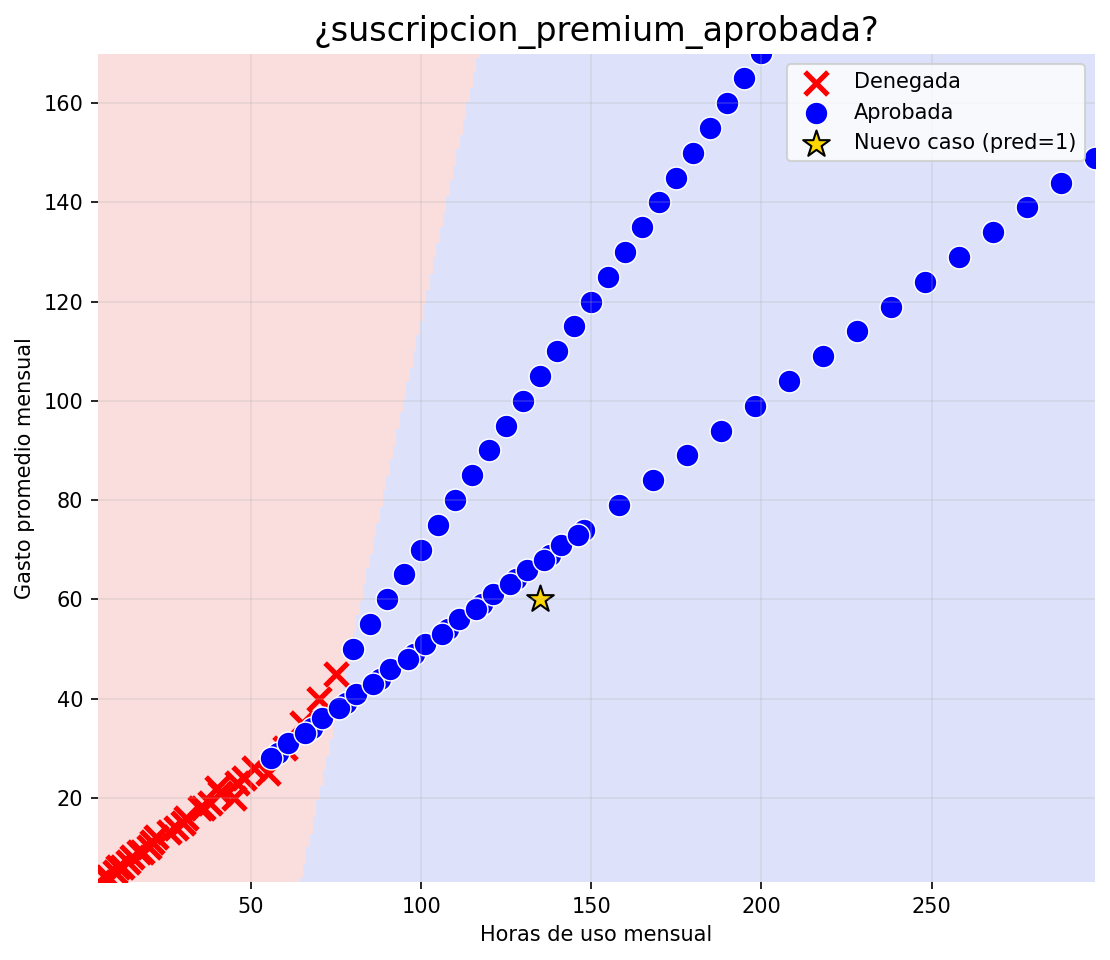

In [70]:
# =========================================
# Zonas de aprobación + Dispersión (edad, ahorro)
# Usa: df, scaler (fit con TRAIN), W, b
# =========================================
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

res = 300
x_min, x_max = df["horas_uso_mensual"].min(),  df["horas_uso_mensual"].max()
y_min, y_max = df["gasto_promedio_mensual"].min(), df["gasto_promedio_mensual"].max()

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, res),
    np.linspace(y_min, y_max, res),
)
grid_orig = np.c_[xx.ravel(), yy.ravel()]
grid_scaled = scaler.transform(grid_orig)

zz = (grid_scaled @ W + b) > 0
zz = zz.reshape(xx.shape).astype(int)

cmap_bg = ListedColormap(["#f8c7c7", "#c7cff8"])
plt.figure(figsize=(7.5, 6.5), dpi=150)
plt.title("¿suscripcion_premium_aprobada?", fontsize=16)

plt.pcolormesh(xx, yy, zz, shading="auto", cmap=cmap_bg, alpha=0.6)

X_orig = df[["horas_uso_mensual", "gasto_promedio_mensual"]].values
y_orig = df["suscripcion_premium_aprobada"].astype(int).values
plt.scatter(X_orig[y_orig == 0, 0], X_orig[y_orig == 0, 1],
            marker="x", s=120, color="red", linewidths=2.5, label="Denegada")
plt.scatter(X_orig[y_orig == 1, 0], X_orig[y_orig == 1, 1],
            marker="o", s=120, color="blue", edgecolor="white", linewidths=0.7, label="Aprobada")

# Nuevo caso ⭐
X_new = np.array([[135, 60]], dtype=float)
X_new_sc = scaler.transform(X_new).ravel()
y_new = 1 if (W @ X_new_sc + b) > 0 else 0
plt.scatter(X_new[0,0], X_new[0,1], s=180, marker="*", edgecolor="k", color="gold",
            label=f"Nuevo caso (pred={y_new})")

plt.xlabel("Horas de uso mensual"); plt.ylabel("Gasto promedio mensual")
plt.xlim(x_min, x_max); plt.ylim(y_min, y_max)
plt.grid(alpha=0.25); plt.legend(loc="upper right")
plt.box(False)   # <- válido en plt (no en ax)
plt.tight_layout(); plt.show()
